# **Lab 5 Concept-based Explainable AI**



---


**Teaching assistant**: Gabriele Ciravegna ( gabriele.ciravegna@polito.it) , Eleonora Poeta ( eleonora.poeta@polito.it )

**Lab 5**: Concept-based XAI - CBM

# **CBM**



---

# **Exercise 1**

In this exercise you have to train a [Concept Bottleneck Model](https://arxiv.org/pdf/2007.04612) (CBM) on the MNIST even/odd dataset.

Specifically you will:



1.   Create the **MNIST even/odd Dataset**. In this variant of MNIST the task is to predict if the digit is even or odd.
> * In addition, you have to predict the **concepts** ( in this case the **concepts are the digits** ).
> * Create the train and test dataset.


2.   Create the **CBM** model.
> * Instanciate the ResNet18 from torchvision.models
> * Retrieve the number of features from the Fully connect of the ResNet.
> * Create the digits (concepts) classifier. This is the concept bottleneck of the network.
> * Create the task classifier (even/odd).

3. Define the **loss** for the problem.
> * The CrossEntropy loss for the concepts.
> * The CrossEntropy loss for the task.

4. Train and test the model.

5. Visualize a few predictions.






---

## Solution:

Imports

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


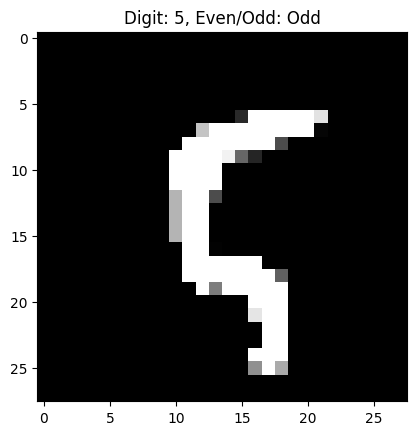

In [2]:
# Class to create the MNIST-EVENODD dataset
class MNISTEvenOdd(torchvision.datasets.MNIST):

    # Constructor for the MNISTEvenOdd class
    def __init__(self, root, train=True, download=False):
        transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize((0.1307,), (0.3081,)), # MNIST mean and std
                                        transforms.Lambda(lambda x: x.repeat(3, 1, 1)) # Repeat the image in 3 channels
                                        ])

        # Call the constructor of the parent class (MNIST)
        super(MNISTEvenOdd, self).__init__(root, train, transform, download=download)

        # Reduce the size of the dataset for the exercise
        self.data = self.data[:10000]
        self.targets = self.targets[:10000]

    # Method to get an item from the dataset
    def __getitem__(self, index):
        # Get the image and target at the given index from the parent class
        img, target = super(MNISTEvenOdd, self).__getitem__(index)

        # define the concept label
        concept = target

        # define the task label as even or odd
        task = target % 2

        # Return the image, concept and task labels
        return img, concept, task

# instantiate the dataset
train_dataset = MNISTEvenOdd(root='.',
                             train=True)

test_dataset = MNISTEvenOdd(root='.',
                            train=False)

# Visualize the dataset
import matplotlib.pyplot as plt

# Get the first image and target from the training dataset
image, target, even_odd = train_dataset[100]

# Plot the image
plt.imshow(image.squeeze().numpy().transpose(1,2,0), cmap='gray')
plt.title(f'Digit: {target}, Even/Odd: {"Odd" if even_odd == 1 else "Even"}')
plt.show()

In [ ]:
# Create the CBM model.

#It should have a ResNet18 as the backbone and two classifying layers: one for the digit and one on top for the even/odd classification.

class CBM(nn.Module):
    def __init__(self, num_concepts=10, num_classes=2):
        super(CBM, self).__init__()
        # Load the ResNet18 model


        # Get the number of features in the ResNet18 classifier




        # Create the digit classifier


        # Create the even/odd classifier on top of the digit classifier


    def forward(self, x):
        # Forward pass through the ResNet18


        # Forward pass through the digit classifier


        # Forward pass through the even/odd classifier


        return

# Create the model
model = CBM()
model = model.eval()

# Make a forward pass with the model
digit, even_odd = model(image.unsqueeze(0))

# Print the output shapes and the associated logits with two digits precision
print('Digit:', digit.shape, digit.detach().numpy().round(2))
print('Even/Odd:', even_odd.shape, even_odd.detach().numpy().round(2))


In [ ]:
# train the model
# train the model
import torch.optim as optim
from torch.utils.data import DataLoader

# Define the batch size
batch_size = 128

# Define the number of epochs
num_epochs = 2

# Create the data loaders

# Define the loss function

# Define the optimizer


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Training on {device}")

In [ ]:
# Train the model
# Iterate over epochs
model = model.to(device)

for epoch in range(num_epochs):

    # Set the model in training mode

    # Iterate over the batches

        # put the image and labels on the device


        # Zero the gradients

        # Forward pass

        # Compute the loss for the digit classification

        # Compute the loss for the even/odd classification

        # Parameter gamma

        # Compute the total loss

        # Backward pass

        # Optimize

        # Print the loss every 10 iterations
        if (i+1) % 10 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))


In [ ]:
    # Evaluate the model on the test set

    # Initialize the accuracy

    # Disable gradient computation

        # Iterate over the test set

            # put the image and labels on the device


            # Forward pass


            # Get the predicted digit


            # Get the predicted even/odd

            # Update the number of correct predictions


    # Compute the accuracy


    # Print the accuracy


In [ ]:
# Visualize a few predictions
import numpy as np

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i in range(4):
    # Get the image and target from the test dataset
    image, target, even_odd = test_dataset[i]

    # Make a forward pass
    predicted_digit, predicted_even_odd = model(image.unsqueeze(0).to(device))

    # Get the predicted digit
    _, predicted_digit = torch.max(predicted_digit, 1)

    # Get the predicted even/odd
    _, predicted_even_odd = torch.max(predicted_even_odd, 1)

    # Plot the image
    axes[i].imshow(image.squeeze().numpy().transpose(1,2,0), cmap='gray')
    axes[i].set_title(f'Target: {target}, Even/Odd: {"Odd" if even_odd else "Even"}\n'
                      f'Predicted: {predicted_digit.item()}, Even/Odd: {"Odd" if predicted_even_odd.item() else "Even"}')
    axes[i].axis('off')
plt.show()
